<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [10]:
import pandas as pd
import pandas_profiling
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import numpy as np
import geopy
import gmplot
from pygeocoder import Geocoder

In [79]:
# import builtins
# builtins.map

map

In [4]:
#read in data
df = pd.read_csv('metadata.csv')
geomap = gpd.read_file('cb_2018_us_state_500k.shp')
crs={'init':'epsg:4326'}

In [5]:
#format columns names
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')

In [6]:
#Create date columns
df['comm_datetime'] = pd.to_datetime(df.comm_timedate_string)
df['comm_date'] = df.comm_datetime.dt.date
df['comm_hour'] = df.comm_datetime.dt.hour
df['comm_month'] = df.comm_datetime.dt.month
df['comm_year'] = df.comm_datetime.dt.year
df['comm_dow'] = df.comm_datetime.dt.weekday

#Geo Columns
df['latlong'] = list(zip(df.latitude, df.longitude))

In [204]:
df.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_datetime,comm_date,comm_hour,comm_month,geometry,longlat,comm_year,comm_dow
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,2014-04-01 09:40:00,2014-04-01,9,4,POINT (151.20230 -33.89293),"(151.20229619999998, -33.89293336)",2014,1
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,2014-04-01 09:42:00,2014-04-01,9,4,POINT (151.20230 -33.89293),"(151.20229619999998, -33.89293336)",2014,1
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,4,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)",2014,1
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,4,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)",2014,1
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,2014-04-01 17:27:00,2014-04-01,17,4,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)",2014,1


In [9]:
df.profile_report()

In [14]:
df.columns

Index(['cell_cgi', 'cell_tower_location', 'comm_identifier',
       'comm_timedate_string', 'comm_type', 'latitude', 'longitude'],
      dtype='object')

In [38]:
df.dtypes

cell_cgi                        object
cell_tower_location             object
comm_identifier                 object
comm_timedate_string            object
comm_type                       object
latitude                       float64
longitude                      float64
comm_datetime           datetime64[ns]
comm_date                       object
comm_hour                        int64
comm_month                       int64
dtype: object

In [39]:
df.describe(include='all')

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_datetime,comm_date,comm_hour,comm_month
count,10476,10476,1374,10476,10476,10476.000000,10476.000000,10476,10476,10476.000000,10476.000000
unique,131,71,130,6382,3,NaN,NaN,6382,304,NaN,NaN
top,505012056EF02,BALGOWLAH HAYES ST,bc0b01860486b0f0a240ce8419d3d7553fe404ab,3/31/15 18:59,Internet,NaN,NaN,2015-03-31 18:59:00,2014-12-23,NaN,NaN
freq,4118,4301,219,26,9102,NaN,NaN,26,299,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-01 09:40:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 23:49:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-35.136188,150.612841,NaN,NaN,14.328656,2014.385357
std,NaN,NaN,NaN,NaN,NaN,3.141723,1.470169,NaN,NaN,5.306271,0.486703
min,NaN,NaN,NaN,NaN,NaN,-42.884810,144.848243,NaN,NaN,0.000000,2014.000000
25%,NaN,NaN,NaN,NaN,NaN,-33.884603,151.202296,NaN,NaN,10.000000,2014.000000


In [181]:
df.cell_cgi.value_counts()

505012056EF02    4118
5.05E+12         1627
5050101532B23     998
505012950037C     711
5050129505A15     491
                 ... 
50501015334B4       1
505012056EF01       1
5.05E+111           1
50501015325C8       1
50501200D4E03       1
Name: cell_cgi, Length: 131, dtype: int64

In [18]:
df.cell_tower_location.value_counts()

BALGOWLAH HAYES ST      4301
CHIPPENDALE             1084
SUNDERLAND ST            723
REDFERN TE               712
HAYMARKET #              563
                        ... 
MASCOT 201 COWARD ST       1
MELB AIRPORT TERM          1
NEWTOWN TE                 1
DALLEY2 #                  1
CARLTON COLLEGE SQ         1
Name: cell_tower_location, Length: 71, dtype: int64

In [182]:
 df.comm_identifier.value_counts()

bc0b01860486b0f0a240ce8419d3d7553fe404ab    219
12e3d1b0c95aa32b6890c4455918dfc10e09fb51    146
91aba4a11359ff3af7902428d20cfa7e676c36e7    144
a24a4646d074a779b45b34b943a47bf33168f791    133
6bbc17070aa91e2dab7909b96c6eecbd6109ba56     83
                                           ... 
4b12e682d816d603ca3820581e31fe1ce71d3e7f      1
ee256d4b16ede847d9d803a23b8b21cf19c19cef      1
0e257b2a4a3ba2a6e3494110353c94f20ab2c608      1
c6a13ece9733678b4108757dfe586e4180cae7bd      1
b421e001abcb383e71191aee0903abe4832313a3      1
Name: comm_identifier, Length: 130, dtype: int64

## Timeseries Data 

In [183]:
 df.comm_timedate_string.value_counts()

3/31/15 18:59     26
1/24/15 20:35     11
12/11/14 16:08    11
2/3/15 8:44       10
12/4/14 6:52       9
                  ..
11/28/14 4:51      1
3/3/15 10:24       1
3/27/15 5:10       1
6/27/14 20:38      1
11/7/14 10:09      1
Name: comm_timedate_string, Length: 6382, dtype: int64

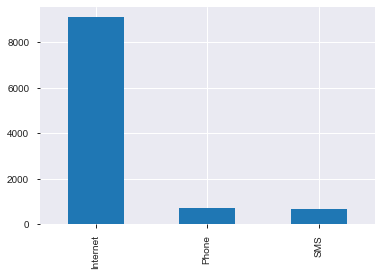

In [44]:
df.comm_type.value_counts().plot(kind='bar')

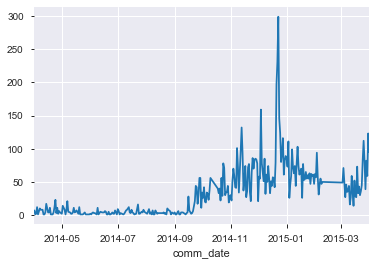

In [116]:
df.groupby('comm_date').cell_cgi.count().plot()

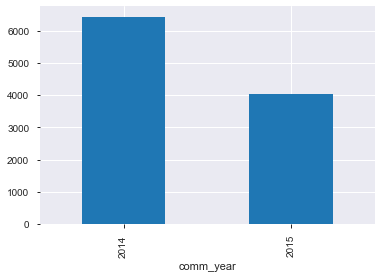

In [207]:
df.groupby('comm_year').cell_cgi.count().plot(kind="bar")

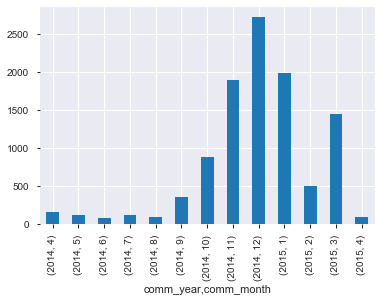

In [209]:
df.groupby(['comm_year','comm_month']).cell_cgi.count().plot(kind="bar")

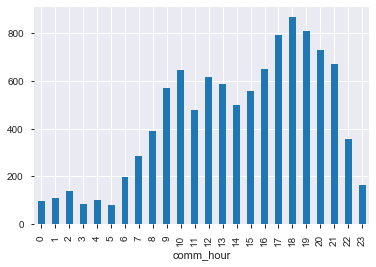

In [50]:
df.groupby('comm_hour').cell_cgi.count().plot(kind='bar')

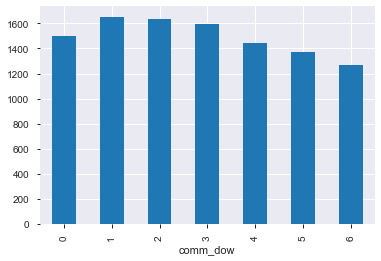

In [205]:
df.groupby('comm_dow').cell_cgi.count().plot(kind='bar')

## GeoData

In [125]:
df.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_datetime,comm_date,comm_hour,comm_month,geometry,longlat
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,2014-04-01 09:40:00,2014-04-01,9,2014,POINT (151.20230 -33.89293),"(151.20229619999998, -33.89293336)"
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,2014-04-01 09:42:00,2014-04-01,9,2014,POINT (151.20230 -33.89293),"(151.20229619999998, -33.89293336)"
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,2014,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)"
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,2014,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)"
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,2014-04-01 17:27:00,2014-04-01,17,2014,POINT (151.20569 -33.88033),"(151.2056904, -33.88032891)"


In [282]:
df.latlong.value_counts()

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
                                             ... 
(-33.87932, 151.23802)                          1
(-42.881009999999996, 147.33346)                1
(-33.89605, 151.17963999999998)                 1
(-37.670418, 144.848243)                        1
(-33.8703, 151.2101)                            1
Name: latlong, Length: 70, dtype: int64

### GeoPandas 

In [109]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geometry[:3]

In [110]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_datetime,comm_date,comm_hour,comm_month,geometry
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,2014-04-01 09:40:00,2014-04-01,9,2014,POINT (151.20230 -33.89293)
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,2014-04-01 09:42:00,2014-04-01,9,2014,POINT (151.20230 -33.89293)
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,2014,POINT (151.20569 -33.88033)
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,2014,POINT (151.20569 -33.88033)
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,2014-04-01 17:27:00,2014-04-01,17,2014,POINT (151.20569 -33.88033)


Text(0.5, 1, 'Cell Tower Pings')

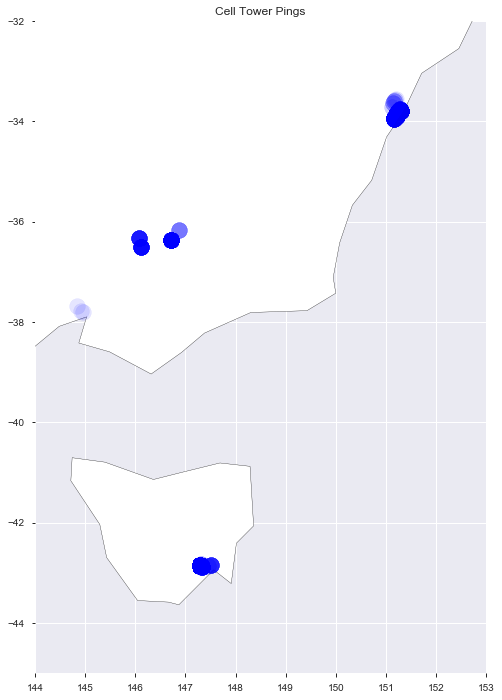

In [307]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world[world.iso_a3 == 'AUS'].plot(color='white',edgecolor='black', figsize=(12,12))

geo_df.plot(ax=ax, color='b', markersize=250, alpha=0.1)
ax.set_ylim(-45,-32)
ax.set_xlim(144,153)
ax.set_title('Cell Tower Pings')

In [344]:
#Create Geo Graph where there's one marker per lat-long point and size of marker reflects number of records

#Create a data frame where each row is a unique lat-long point and the column is the count of records
dfn = df.groupby(['longitude','latitude']).cell_cgi.count().sort_values(ascending=False).to_frame().reset_index()
dfn.rename(columns={'cell_cgi':'calls'}, inplace=True)
dfn

,longitude,latitude,calls
0,151.266540,-33.788150,4301
1,151.202350,-33.884171,1084
2,147.295690,-42.843380,723
3,151.202296,-33.892933,712
4,151.205690,-33.880329,563
...,...,...,...
65,151.208430,-33.862850,1
66,151.210100,-33.870300,1
67,144.968730,-37.792900,1
68,144.930000,-37.777800,1


In [345]:
geometry = [Point(xy) for xy in zip(dfn.longitude, dfn.latitude)]

In [352]:
geo_dfn = gpd.GeoDataFrame(dfn, crs=crs, geometry=geometry)
geo_dfn.sample(20)

,longitude,latitude,calls,geometry
8,151.285293,-33.796679,231,POINT (151.28529 -33.79668)
61,151.216530,-33.892330,1,POINT (151.21653 -33.89233)
62,151.188043,-33.924799,1,POINT (151.18804 -33.92480)
28,151.246980,-33.806380,20,POINT (151.24698 -33.80638)
1,151.202350,-33.884171,1084,POINT (151.20235 -33.88417)
37,151.200460,-33.880580,10,POINT (151.20046 -33.88058)
20,151.263100,-33.793450,30,POINT (151.26310 -33.79345)
58,151.203950,-33.911320,2,POINT (151.20395 -33.91132)
9,147.315320,-42.853070,197,POINT (147.31532 -42.85307)
19,151.167140,-33.946740,33,POINT (151.16714 -33.94674)


Text(0.5, 1, 'Cell Tower Pings')

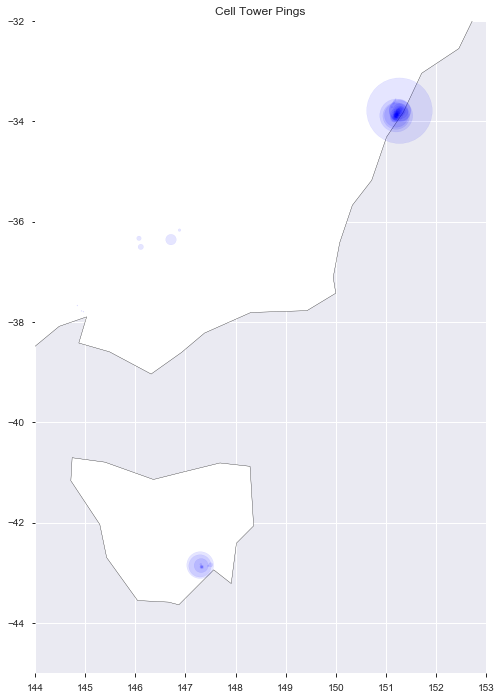

In [349]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world[world.iso_a3 == 'AUS'].plot(color='white',edgecolor='black', figsize=(12,12))

geo_dfn.plot(ax=ax, color='b', markersize=dfn.calls, alpha=0.1)
ax.set_ylim(-45,-32)
ax.set_xlim(144,153)
ax.set_title('Cell Tower Pings')

## comm_identifier
Who recieved the call

In [398]:
#called 130 different people
dfc = df.comm_identifier.value_counts().to_frame().reset_index(level=0)
dfc.rename(columns={'comm_identifier':'calls','index':'comm_identifier'}, inplace=True)

In [399]:
dfc

,comm_identifier,calls
0,bc0b01860486b0f0a240ce8419d3d7553fe404ab,219
1,12e3d1b0c95aa32b6890c4455918dfc10e09fb51,146
2,91aba4a11359ff3af7902428d20cfa7e676c36e7,144
3,a24a4646d074a779b45b34b943a47bf33168f791,133
4,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,83
...,...,...
125,4b12e682d816d603ca3820581e31fe1ce71d3e7f,1
126,ee256d4b16ede847d9d803a23b8b21cf19c19cef,1
127,0e257b2a4a3ba2a6e3494110353c94f20ab2c608,1
128,c6a13ece9733678b4108757dfe586e4180cae7bd,1


In [397]:
dfc.columns

Index(['index', 'comm_identifier'], dtype='object')

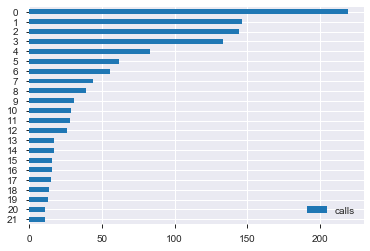

In [405]:
dfc[dfc.calls >= 10][::-1].plot(kind='barh')

## Junk Yard 

In [ ]:
for point in geo_df:
    geo_df.plot(ax=ax, color='red', markersize=10)

Let's Try This
https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [174]:
dfll = df.loc[:,['latitude','longitude']]

In [176]:
BBox = ((dfll.longitude.min(),   dfll.longitude.max(),      
         dfll.latitude.min(), dfll.latitude.max()))

In [177]:
BBox

(144.848243, 151.28933999999998, -42.884809999999995, -33.55731)

In [178]:
ruh_m = plt.imread('map1.png')

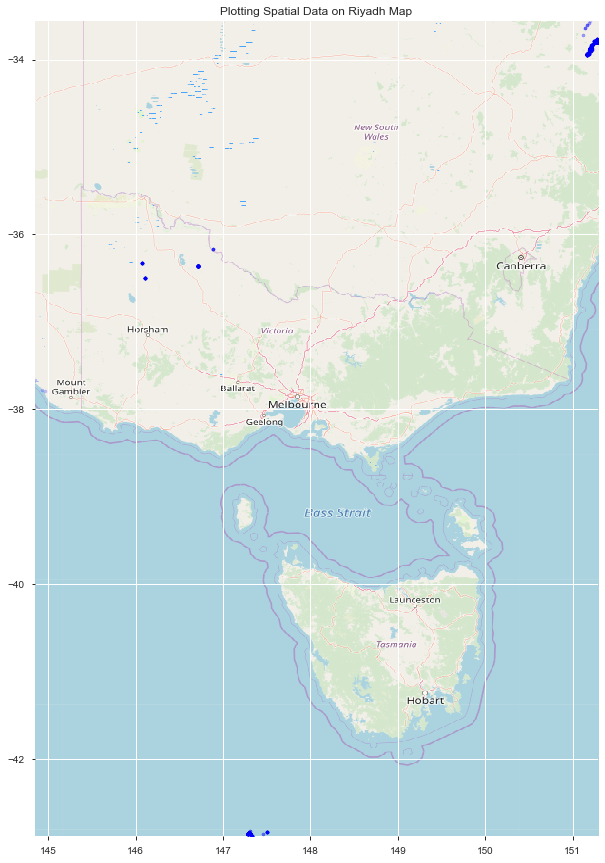

In [255]:
fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(dfll.longitude, dfll.latitude, zorder=1, 
           alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

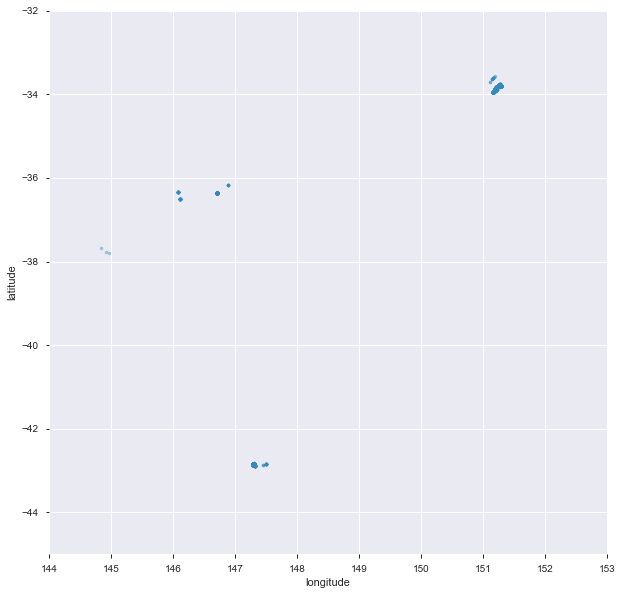

In [276]:
df.plot.scatter(y='latitude',x='longitude',
                alpha=0.4, figsize=(10,10),
                s=10, xlim=(144,153), ylim=(-45,-32))

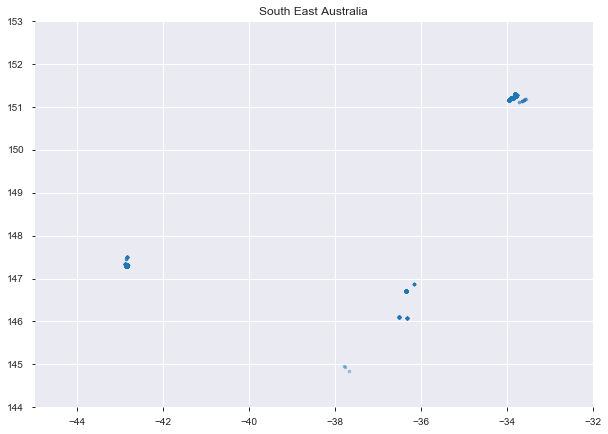

In [267]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x=df.latitude, y=df.longitude, 
           alpha=0.4, s=10)
ax.set_title('South East Australia')
ax.set_xlim(-45,-32)
ax.set_ylim(144,153)
ax.imshow(pic, extent = (144, 153, -45, -32), aspect= 'equal')

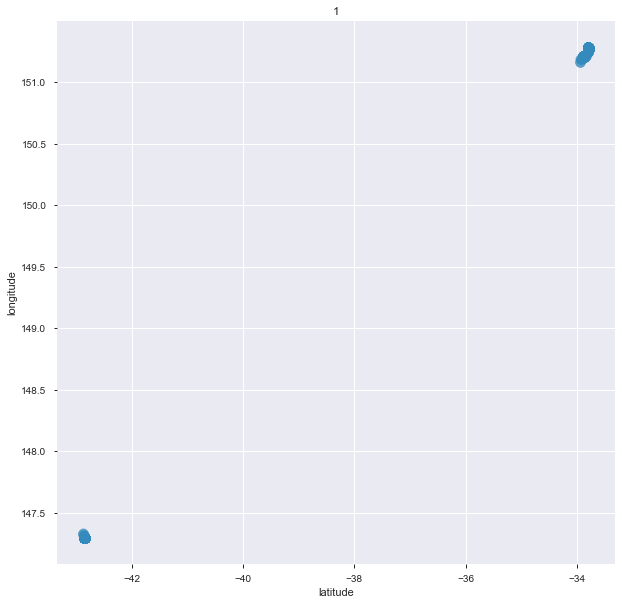

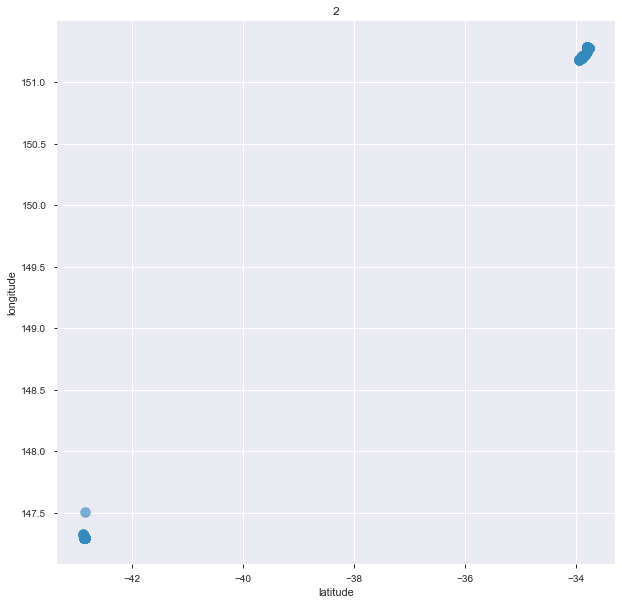

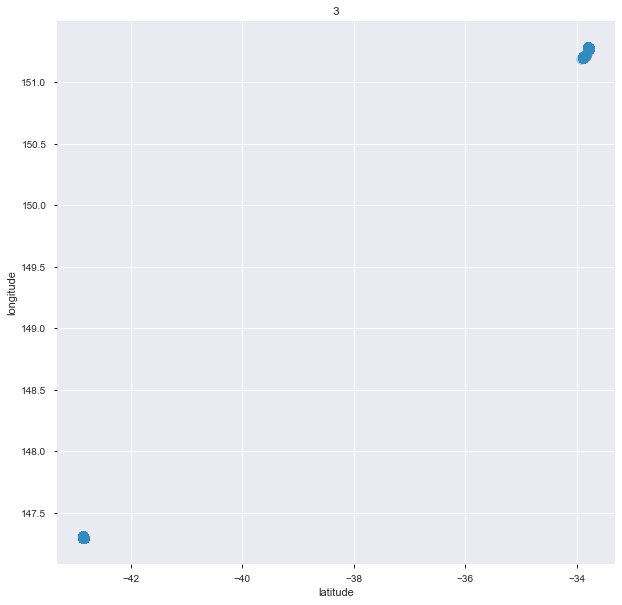

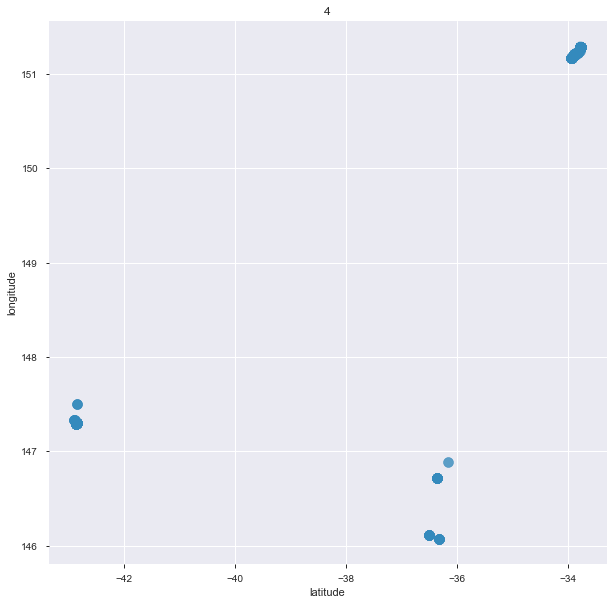

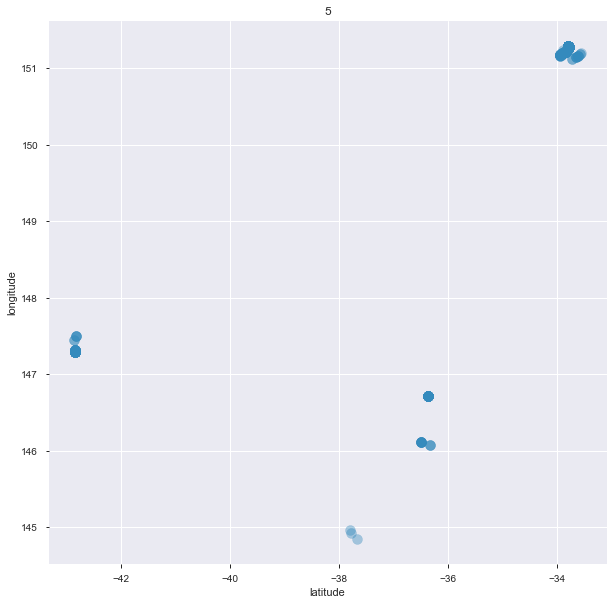

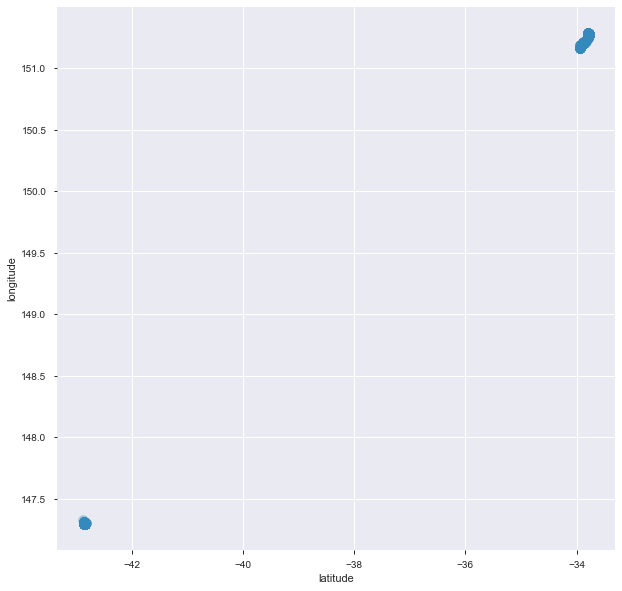

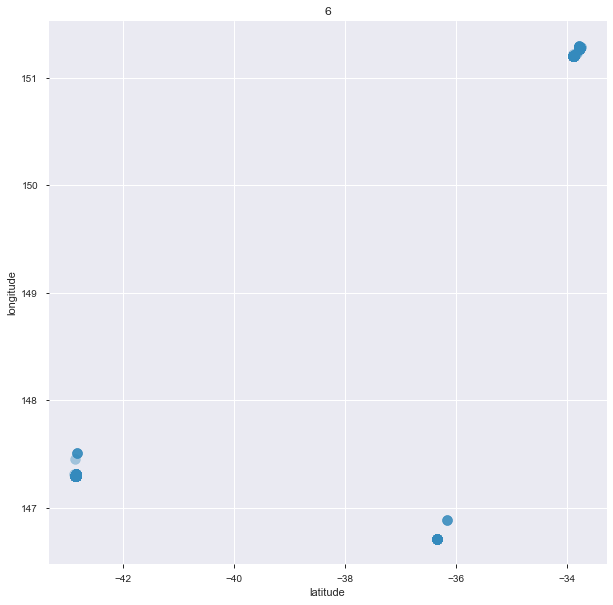

In [231]:
#Scatter for each day of week
for day in df.comm_dow.unique():
    df[df.comm_dow==day].plot.scatter(x='latitude',y='longitude',
                alpha=0.4, figsize=(10,10),
                s=100, title=day)

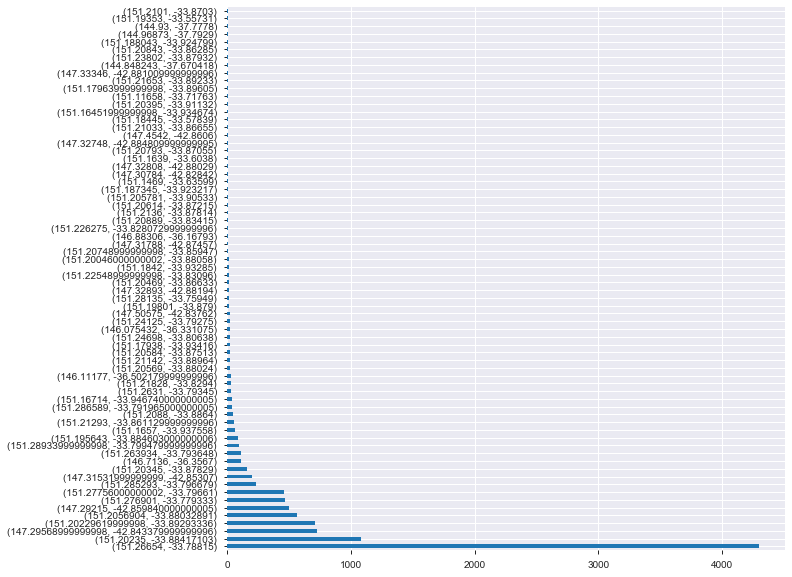

In [187]:
 df.latlong.value_counts().plot(kind='barh', figsize=(10,10))

In [8]:
df.head()

,cell_cgi,cell_tower_location,comm_identifier,comm_timedate_string,comm_type,latitude,longitude,comm_datetime,comm_date,comm_hour,comm_month,comm_year,comm_dow,latlong
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,2014-04-01 09:40:00,2014-04-01,9,4,2014,1,"(-33.89293336, 151.20229619999998)"
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,2014-04-01 09:42:00,2014-04-01,9,4,2014,1,"(-33.89293336, 151.20229619999998)"
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,4,2014,1,"(-33.88032891, 151.2056904)"
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,2014-04-01 13:13:00,2014-04-01,13,4,2014,1,"(-33.88032891, 151.2056904)"
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,2014-04-01 17:27:00,2014-04-01,17,4,2014,1,"(-33.88032891, 151.2056904)"


In [24]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
df['location'] = df.latlong.apply(geocode)


RateLimiter caught an error, retrying (0/2 tries). Called with (*((-33.89293336, 151.20229619999998),), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1406, in connect
    super().connect()
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*((-33.88032891, 151.2056904),), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1406, in connect
    super().connect()
  File "/

RateLimiter caught an error, retrying (0/2 tries). Called with (*((-33.88032891, 151.2056904),), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1414, in connect
    server_hostname=server_host

KeyboardInterrupt: 

In [25]:
geolocator.reverse(df.latlong[0])

Location(Redfern Telstra Exchange, 103-109, George Street, Redfern, Sydney, Council of the City of Sydney, New South Wales, 2016, Australia, (-33.89302255, 151.20235416548, 0.0))

In [53]:
df.latlong.value_counts()

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
                                             ... 
(-33.87932, 151.23802)                          1
(-42.881009999999996, 147.33346)                1
(-33.89605, 151.17963999999998)                 1
(-37.670418, 144.848243)                        1
(-33.8703, 151.2101)                            1
Name: latlong, Length: 70, dtype: int64

In [54]:
dflatlong = df.latlong

In [55]:
dflatlong = dflatlong.drop_duplicates()

In [56]:
len(dflatlong)

70

In [52]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="matt_ga_test")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
dflatlong['location'] = dflatlong.apply(geocode)

ValueError: ('Must be a coordinate pair or Point', 'occurred at index latlong')